<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#2
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target_class'] = iris.target

In [3]:
#3
print("Data Dimensions:", df.shape)
print("First few rows:\n", df.head())
print("Column Names:\n", df.columns)



Data Dimensions: (150, 5)
First few rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0  
Column Names:
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target_class'],
      dtype='object')


In [4]:
# Check distribution of target column
distribution=df['target_class'].value_counts(normalize=True)*100
print("Target columkn distribution : -",distribution)

Target columkn distribution : - target_class
0    33.333333
1    33.333333
2    33.333333
Name: proportion, dtype: float64


In [5]:
#4
print("Dataset Summary:\n", df.describe())
print("Information:\n", df.info())

Dataset Summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  target_class  
count        150.000000    150.000000  
mean           1.199333      1.000000  
std            0.762238      0.819232  
min            0.100000      0.000000  
25%            0.300000      0.000000  
50%            1.300000      1.000000  
75%            1.800000      2.000000  
max            2.500000      2.000000  
<class 'pandas.core.frame.DataFrame'

In [6]:
# 5. Explore Missing Values and Outliers
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target_class         0
dtype: int64


In [7]:
# Summary statistics for numerical variables
numeric_features=df.select_dtypes(include=[np.number]).columns
print("Numerical Summary:\n",df[numeric_features].describe())

Numerical Summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  target_class  
count        150.000000    150.000000  
mean           1.199333      1.000000  
std            0.762238      0.819232  
min            0.100000      0.000000  
25%            0.300000      0.000000  
50%            1.300000      1.000000  
75%            1.800000      2.000000  
max            2.500000      2.000000  


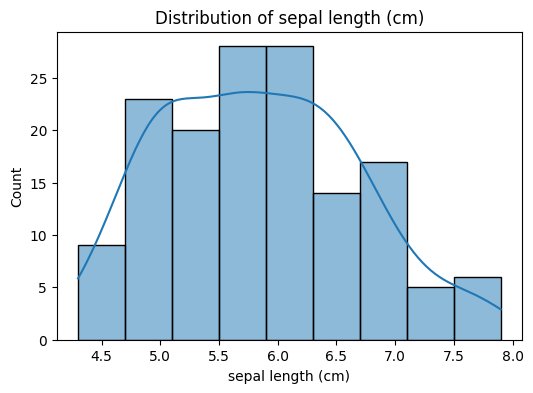

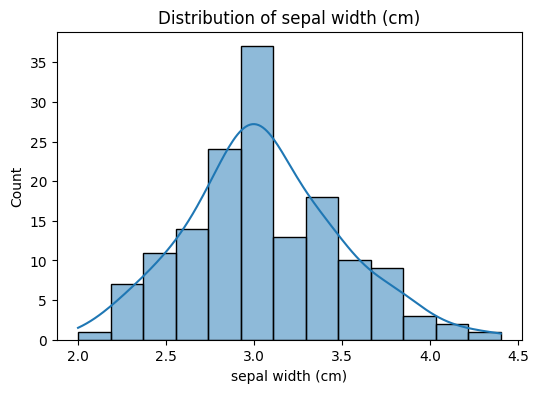

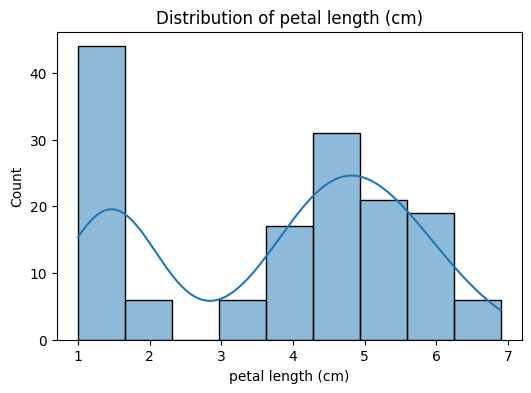

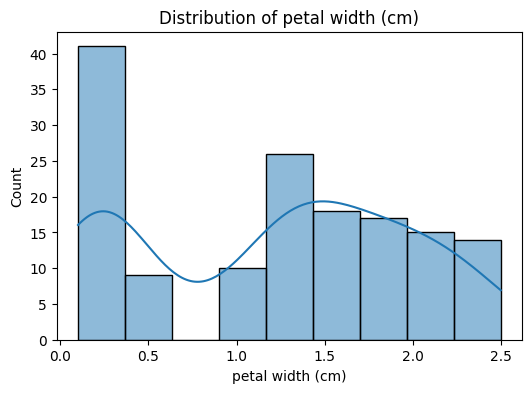

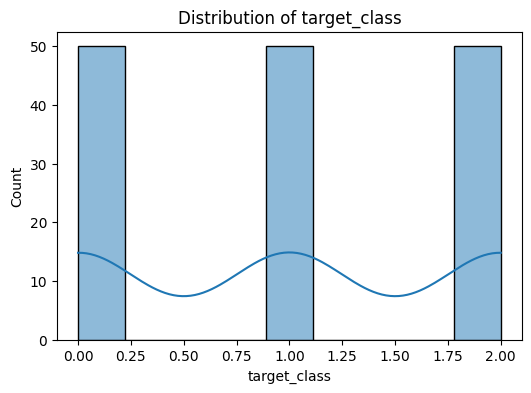

In [8]:
# 6. Check Distribution of Variables
for column in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [9]:
#7
X=df.drop(columns="target_class")
y = df['target_class']               # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
#8
svm_default=SVC()
svm_default.fit(X_train,y_train)
y_pred_default=svm_default.predict(X_test)
print('Default SVM accuracy',accuracy_score(y_test,y_pred_default))

Default SVM accuracy 0.9777777777777777


In [12]:
#9
for c in [1.0,100.0,1000.0]:
  svm_rbf=SVC(kernel='rbf',C=c,gamma='auto')
  svm_rbf.fit(X_train,y_train)
  y_pred_rbf=svm_rbf.predict(X_test)
  print(f"RBF kernel Accouracy",accuracy_score(y_test,y_pred_rbf))


RBF kernel Accouracy 0.9777777777777777
RBF kernel Accouracy 0.9777777777777777
RBF kernel Accouracy 0.9777777777777777


In [13]:
# 10. Run SVM with Linear Kernel and Different C Values
for C in [1.0, 100.0, 1000.0]:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train, y_train)
    y_pred_linear = svm_linear.predict(X_test)
    print(f"Linear Kernel SVM Accuracy with C={C}:", accuracy_score(y_test, y_pred_linear))

Linear Kernel SVM Accuracy with C=1.0: 0.9777777777777777
Linear Kernel SVM Accuracy with C=100.0: 0.9555555555555556
Linear Kernel SVM Accuracy with C=1000.0: 0.9777777777777777


In [15]:
 #11.
for C in [1.0, 100.0, 1000.0]:
    svm_poly = SVC(kernel='poly', C=C)
    svm_poly.fit(X_train, y_train)
    y_pred_poly = svm_poly.predict(X_test)
    print(f"Polynomial Kernel SVM Accuracy with C={C}:", accuracy_score(y_test, y_pred_poly))

Polynomial Kernel SVM Accuracy with C=1.0: 0.9777777777777777
Polynomial Kernel SVM Accuracy with C=100.0: 0.9777777777777777
Polynomial Kernel SVM Accuracy with C=1000.0: 0.9777777777777777


In [16]:
# 12. Run SVM with Sigmoid Kernel and Different C Values
for C in [1.0, 100.0, 1000.0]:
    svm_sigmoid = SVC(kernel='sigmoid', C=C)
    svm_sigmoid.fit(X_train, y_train)
    y_pred_sigmoid = svm_sigmoid.predict(X_test)
    print(f"Sigmoid Kernel SVM Accuracy with C={C}:", accuracy_score(y_test, y_pred_sigmoid))

Sigmoid Kernel SVM Accuracy with C=1.0: 0.24444444444444444
Sigmoid Kernel SVM Accuracy with C=100.0: 0.044444444444444446
Sigmoid Kernel SVM Accuracy with C=1000.0: 0.044444444444444446


In [17]:
#13
train_accuracy = accuracy_score(y_train, svm_rbf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_rbf)
print("Train-set Accuracy (RBF, C=1):", train_accuracy)
print("Test-set Accuracy (RBF, C=1):", test_accuracy)

Train-set Accuracy (RBF, C=1): 1.0
Test-set Accuracy (RBF, C=1): 0.9777777777777777


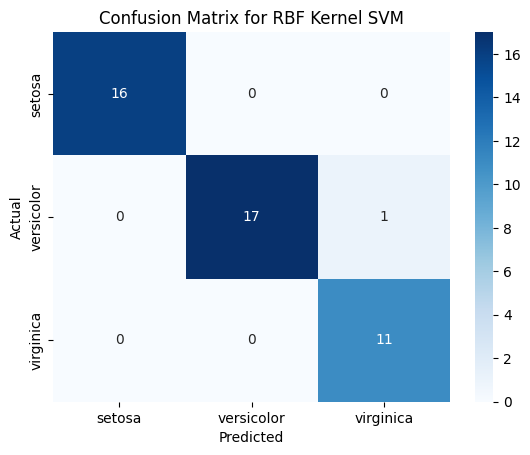

In [18]:
# 14. Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rbf)  # Example with RBF kernel
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RBF Kernel SVM')
plt.show()

In [19]:
# 15. Generate Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rbf, target_names=iris.target_names))

# 16. Evaluate Classification Accuracy and Classification Error
classification_accuracy = accuracy_score(y_test, y_pred_rbf)
classification_error = 1 - classification_accuracy
print("Classification Accuracy:", classification_accuracy)
print("Classification Error:", classification_error)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Classification Accuracy: 0.9777777777777777
Classification Error: 0.022222222222222254
